##### About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 
 Sales -- Unit sales (in thousands) at each location
 Competitor Price -- Price charged by competitor at each location
 Income -- Community income level (in thousands of dollars)
 Advertising -- Local advertising budget for company at each location (in thousands of dollars)
 Population -- Population size in region (in thousands)
 Price -- Price company charges for car seats at each site
 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
 Age -- Average age of the local population
 Education -- Education level at each location
 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
 US -- A factor with levels No and Yes to indicate whether the store is in the US or not
The company dataset looks like this: 
 
Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  

# 1. Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

# 2. Importing data

In [2]:
company_data=pd.read_csv("Company_Data.csv")
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


# 3. Data Analysis

In [3]:
company_data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [4]:
company_data.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [5]:
company_data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [6]:
company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


# 4. Feature Selection and Data Preparation

In [7]:
# first convert it in categorical variable
company_data['ShelveLoc']=company_data['ShelveLoc'].astype('category')
company_data['Urban']=company_data['Urban'].astype('category')
company_data['US']=company_data['US'].astype('category')
company_data.dtypes

Sales           float64
CompPrice         int64
Income            int64
Advertising       int64
Population        int64
Price             int64
ShelveLoc      category
Age               int64
Education         int64
Urban          category
US             category
dtype: object

In [8]:
company_data['ShelveLoc'].value_counts

<bound method IndexOpsMixin.value_counts of 0         Bad
1        Good
2      Medium
3      Medium
4         Bad
        ...  
395      Good
396    Medium
397    Medium
398       Bad
399      Good
Name: ShelveLoc, Length: 400, dtype: category
Categories (3, object): ['Bad', 'Good', 'Medium']>

In [9]:
company_data['ShelveLoc']=company_data['ShelveLoc'].cat.codes
company_data['Urban']=company_data['Urban'].cat.codes
company_data['US']=company_data['US'].cat.codes

C:\Users\vinay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


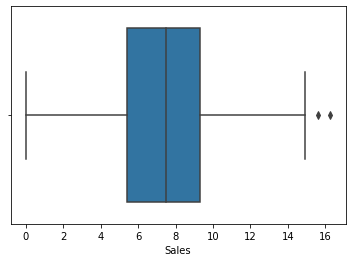

In [10]:
ax = sns.boxplot(company_data['Sales']) # checking for outliers

Skew: 0.18556036318721578
Kurtosis: -0.08087736743346197


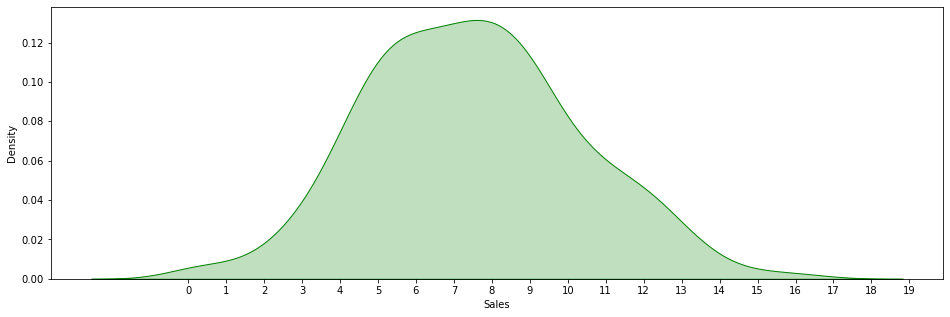

In [11]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(company_data['Sales'].skew()))
print("Kurtosis: {}".format(company_data['Sales'].kurtosis()))
ax = sns.kdeplot(company_data['Sales'],shade=True,color='g')
plt.xticks([i for i in range(0,20,1)])
plt.show() ##### Right skewed

#### Converting target variable to discrete data

In [12]:
company_data['Sales'] = company_data.Sales.map(lambda x: 1 if x>8 else 0)
company_data['Sales']

0      1
1      1
2      1
3      0
4      0
      ..
395    1
396    0
397    0
398    0
399    1
Name: Sales, Length: 400, dtype: int64

In [13]:
feature_cols=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
x = company_data[feature_cols]
y = company_data.Sales
print(x)
print(y)

     CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0          138      73           11         276    120          0   42   
1          111      48           16         260     83          1   65   
2          113      35           10         269     80          2   59   
3          117     100            4         466     97          2   55   
4          141      64            3         340    128          0   38   
..         ...     ...          ...         ...    ...        ...  ...   
395        138     108           17         203    128          1   33   
396        139      23            3          37    120          2   55   
397        162      26           12         368    159          2   40   
398        100      79            7         284     95          0   50   
399        134      37            0          27    120          1   49   

     Education  Urban  US  
0           17      1   1  
1           10      1   1  
2           12      1   1  

# 5. Model Building, training and testing 

In [17]:
X_train,X_test,y_train,y_test= train_test_split(x,y, test_size=0.2)

In [31]:
dcmodel =(DecisionTreeClassifier(criterion="gini",max_depth = 10))
dcmodel

DecisionTreeClassifier(max_depth=10)

In [34]:
dcmodel = dcmodel.fit(X_train,y_train) #train decision tree
y_predict_train=dcmodel.predict(X_train)
y_predict = dcmodel.predict(X_test)
print("Accuracy for train data:",accuracy_score(y_train,y_predict_train)*100)
print("Accuracy for test data: ", accuracy_score(y_test,y_predict)*100 )
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

Accuracy for train data: 99.6875
Accuracy for test data:  72.5
[[40 14]
 [ 8 18]]
              precision    recall  f1-score   support

           0       0.83      0.74      0.78        54
           1       0.56      0.69      0.62        26

    accuracy                           0.73        80
   macro avg       0.70      0.72      0.70        80
weighted avg       0.75      0.72      0.73        80



In [35]:
path=dcmodel.cost_complexity_pruning_path(X_train,y_train)
alpha=path['ccp_alphas']
alpha

array([0.        , 0.00267857, 0.00273437, 0.00299479, 0.0030599 ,
       0.00401786, 0.00416667, 0.00416667, 0.0046875 , 0.0046875 ,
       0.005     , 0.00520833, 0.00537574, 0.00551563, 0.00577424,
       0.00588235, 0.00588848, 0.0060049 , 0.00703125, 0.00770032,
       0.0078125 , 0.00837054, 0.01043347, 0.01086806, 0.01111836,
       0.01159683, 0.01182321, 0.01328379, 0.0133265 , 0.01755075,
       0.0226835 , 0.03305556, 0.04013624, 0.04767461, 0.04958429])

In [50]:
accuracy_train,accuracy_test=[],[]
for i in alpha:
    dcmodel=DecisionTreeClassifier(ccp_alpha=i)
    dcmodel.fit(X_train,y_train)
    y_predict_train=dcmodel.predict(X_train)
    y_predict = dcmodel.predict(X_test)
    accuracy_train.append(accuracy_score(y_train,y_predict_train))
    accuracy_test.append(accuracy_score(y_test,y_predict))
    

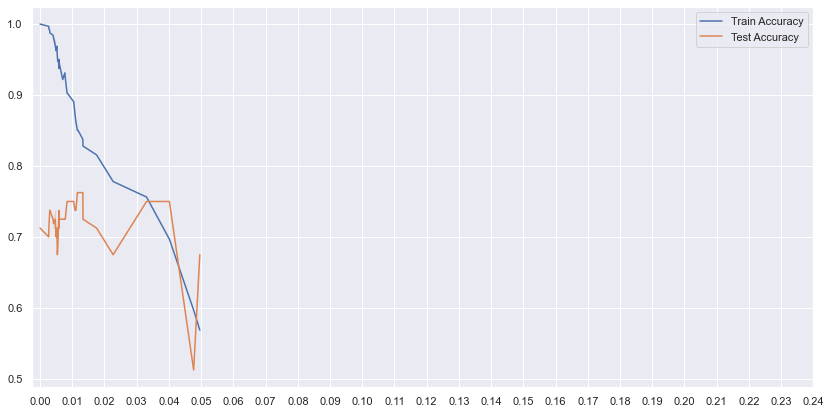

In [53]:
sns.set()
plt.figure(figsize=(14,7))
sns.lineplot(y=accuracy_train,x=alpha,label="Train Accuracy")
sns.lineplot(y=accuracy_test,x=alpha,label="Test Accuracy")
plt.xticks(ticks=np.arange(0.00,0.25,0.01))
plt.show()

In [58]:
dcmodel=DecisionTreeClassifier(ccp_alpha=0.035)
dcmodel.fit(X_train,y_train)
y_predict_train=dcmodel.predict(X_train)
y_predict = dcmodel.predict(X_test)
print(accuracy_score(y_train,y_predict_train))
print(accuracy_score(y_test,y_predict))

0.75625
0.75
